# Sentiment Analysis Model

change current directory and import packages

In [1]:
%load_ext lab_black
import os
import numpy as np

In [2]:
if not os.path.exists("/sentiment_analysis"):
    os.chdir("..")

import packages

In [3]:
from sentiment_analysis.utils.train_test_split import TrainTestSplit
from sentiment_analysis.models.model import StreamlinedModel
from sentiment_analysis.features.word_frequencies import WordFrequencyVectorizer
from sentiment_analysis.data.review_processor import ReviewProcessor
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import lightgbm as lgb
import shap
import pandas as pd

Perform train test split on the reviews data

In [4]:
X_train, y_train, X_test, y_test = TrainTestSplit().get_split_data()

### Logisitic Regression

In [5]:
logistic = StreamlinedModel(
    transformer_description="word frequency vector",
    transformer=WordFrequencyVectorizer,
    model_description="logisitc regression model",
    model=LogisticRegression,
)

train the streamlined model

In [6]:
logistic.train(X_train, y_train)

In [7]:
print("Train accuracy:", logistic.score(X_train, y_train))
print("Test accuracy:", logistic.score(X_test, y_test))

Train accuracy: 0.7579166666666667
Test accuracy: 0.73875


get predictions

In [8]:
y_pred = logistic.predict(X_test)
y_prob = logistic.predict_proba(X_test)

In [9]:
print("Test ROC:", roc_auc_score(y_test, y_prob[:, 1]))

Test ROC: 0.80290625


### Naive Bayes

In [10]:
gaussian_naive_bayes = StreamlinedModel(
    transformer_description="word frequency vector",
    transformer=WordFrequencyVectorizer,
    model_description="naive bayes model",
    model=GaussianNB,
)

In [11]:
gaussian_naive_bayes.train(X_train, y_train)

In [12]:
print("Train accuracy:", gaussian_naive_bayes.score(X_train, y_train))
print("Test accuracy:", gaussian_naive_bayes.score(X_test, y_test))

Train accuracy: 0.9486111111111111
Test accuracy: 0.6175


In [13]:
y_pred = gaussian_naive_bayes.predict(X_test)
y_prob = gaussian_naive_bayes.predict_proba(X_test)

In [14]:
print("Test ROC:", roc_auc_score(y_test, y_prob[:, 1]))

Test ROC: 0.616875


In [15]:
multinomial_naive_bayes = StreamlinedModel(
    transformer_description="word frequency vector",
    transformer=WordFrequencyVectorizer,
    model_description="naive bayes model",
    model=MultinomialNB,
)

In [16]:
multinomial_naive_bayes.train(X_train, y_train)

In [17]:
print("Train accuracy:", multinomial_naive_bayes.score(X_train, y_train))
print("Test accuracy:", multinomial_naive_bayes.score(X_test, y_test))

Train accuracy: 0.8552777777777778
Test accuracy: 0.82


In [18]:
y_pred = multinomial_naive_bayes.predict(X_test)
y_prob = multinomial_naive_bayes.predict_proba(X_test)

In [19]:
print("Test ROC:", roc_auc_score(y_test, y_prob[:, 1]))

Test ROC: 0.8850437499999999


### LightGBM

Build Word Frequency Vectors and lightGBM model and train using the training data

In [20]:
lightgbm = StreamlinedModel(
    transformer_description="word frequency vector",
    transformer=WordFrequencyVectorizer,
    model_description="LightGBM model",
    model=lgb.LGBMClassifier,
    model_params={
        "application": "binary",
        "objective": "binary",
        "metric": "auc",
        "is_unbalance": "false",
        "boosting": "gbdt",
        "num_leaves": 31,
        "feature_fraction": 0.06,
        "bagging_fraction": 0.67,
        "bagging_freq": 1,
        "learning_rate": 0.05,
        "verbose_eval": 0,
        "n_estimators": 2000,
        "n_jobs": 6,
    },
)

train the streamlined model

In [21]:
lightgbm.train(X_train, y_train)

get scores

In [22]:
print("Train accuracy:", lightgbm.score(X_train, y_train))
print("Test accuracy:", lightgbm.score(X_test, y_test))

Train accuracy: 0.9991666666666666
Test accuracy: 0.805


get predictions and predicted probabilities

In [23]:
y_pred = lightgbm.predict(X_test)
y_prob = lightgbm.predict_proba(X_test)

In [24]:
print("Test ROC:", roc_auc_score(y_test, y_prob[:, 1]))

Test ROC: 0.89594375


We were able to achieve some quite amazing results with LightGBM model. The next two steps we can have a look are

1. Check the most wrong positive and negative reviews
2. use SHAP to understand which word are more likely to lead to lightGBM 

**Most wrong positive/negative reviews**

get the raw review texts and rank by smallest distance of 0/1

In [25]:
wrong_positive_inds = np.where((y_test == 1) & (y_pred != y_test))[0]
wrong_negative_inds = np.where((y_test == 0) & (y_pred != y_test))[0]

In [26]:
most_wrong_positive_index = wrong_positive_inds[
    y_prob[:, 1][wrong_positive_inds].argmax()
]
most_wrong_negative_index = wrong_negative_inds[
    y_prob[:, 1][wrong_negative_inds].argmin()
]

In [27]:
print("Most wrong positive review: \n")

print(np.array(X_test)[most_wrong_positive_index])

Most wrong positive review: 


The sound quality is pretty darn good, except that if you pace around while talking/listening, there are these annoying clicking/scratching sounds.  They are quite, and, if you stand still they go away.  I've had other phones that click/scratch while pacing around, and they actually dropped some of the sound during the clicking - at least this phone doesn't do that.  

My 900 MHz DSS Uniden didn't have these sounds (while pacing or otherwise), and still had greater range.  I don't know why the new technology can't measure up.  Still though, this is the best 5.8 I've tried.  (Yet I'd rather buy another 900MHz DSS if there were any on the market anymore.  All of today's 900MHz are analog instead of digital.)

Another annoying thing is that you can't recharge the phone with the belt clip attached, so the clip goes on and off (and on and off).  (Many (cell) phones have a charger that allows this.)

The plastic is a bit cheap.  Don't drop this phone.  My frien

In [28]:
print("Most wrong negative review: \n")

print(np.array(X_test)[most_wrong_negative_index])

Most wrong negative review: 


I was excited when this movie showed up in the mail and immediately put it in my DVD player and sat down to watch.  It didn't take long for me to realize it was a cheaply made film.  The story was interesting and had it been done in a better way, the film could have been great but after having seen movies such as Trick and Latter Days where the acting and production quality were very good, I found myself feeling dissapointed after only a few moments.  It is not a movie I would readily recommend



As we can see, the most wrong positive/negative reviews would be pretty tough to get right even for human

**SHAP Model Explanation**

get shap explainer and training data

In [29]:
shap_explainer = shap.TreeExplainer(lightgbm.pipeline.steps[1][1])
training_data_transformed = lightgbm.pipeline.steps[0][1].transform(X_train)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [30]:
words_index_map = lightgbm.pipeline.steps[0][1].word_to_index_map
words_index_map = {k: v for k, v in sorted(words_index_map.items(), key=lambda x: x[1])}
column_names = list(words_index_map.keys())
training_data_transformed = pd.DataFrame(
    training_data_transformed, columns=column_names
)

get shap values

In [31]:
shap_values = shap_explainer.shap_values(training_data_transformed)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


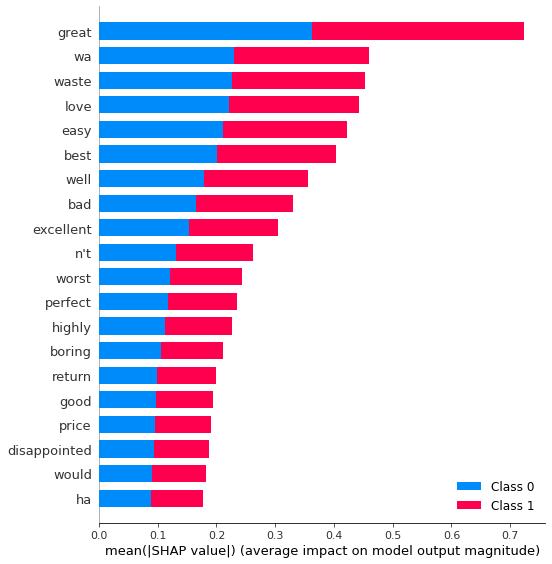

In [32]:
shap.summary_plot(shap_values, training_data_transformed)

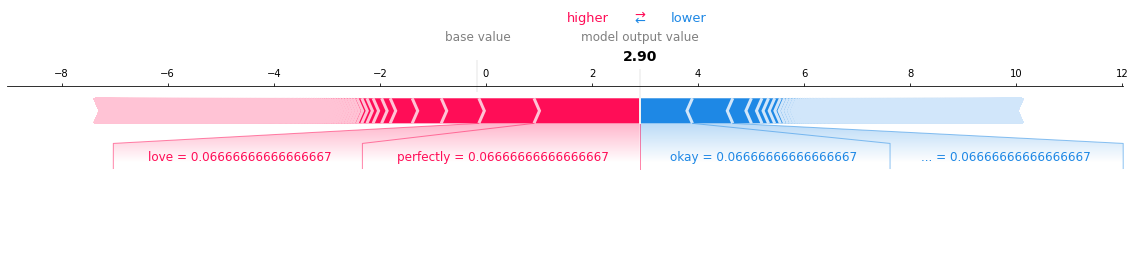

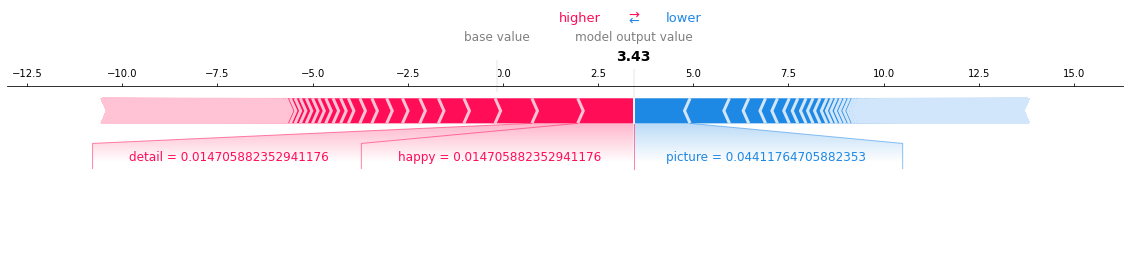

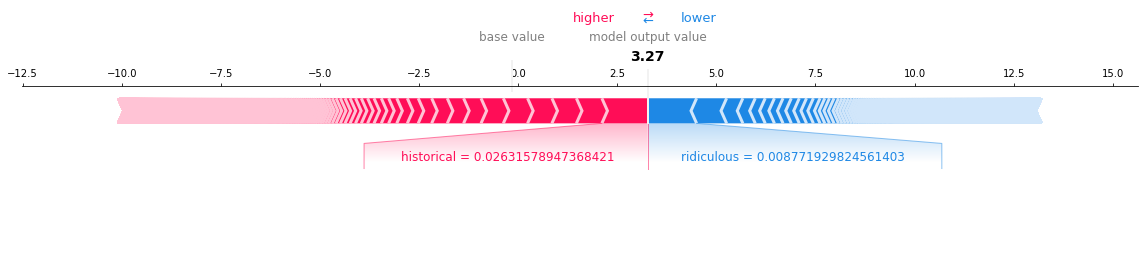

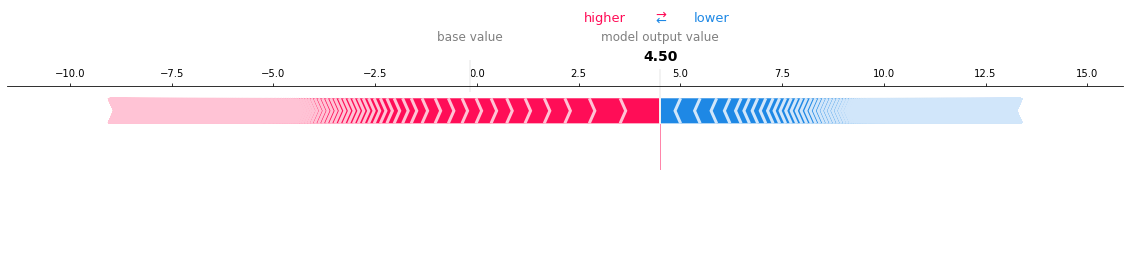

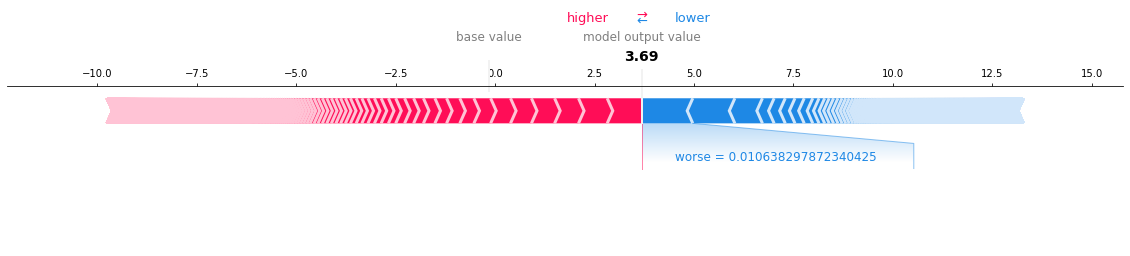

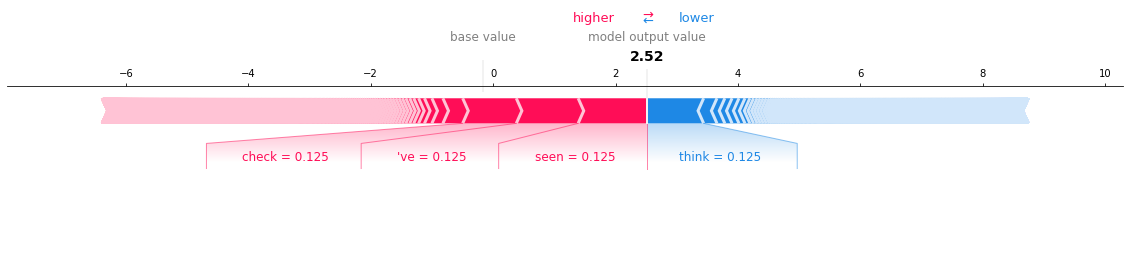

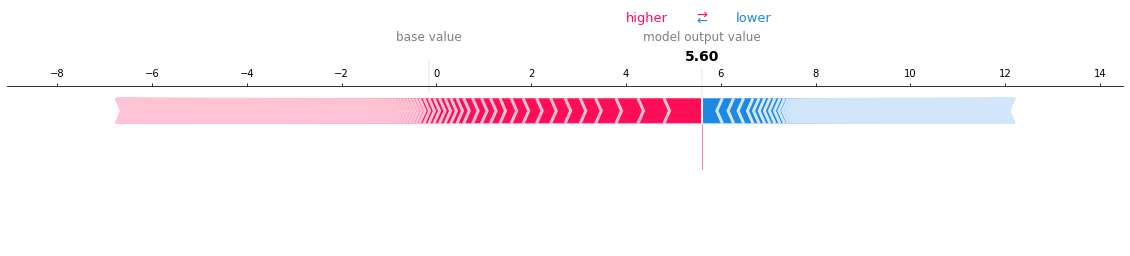

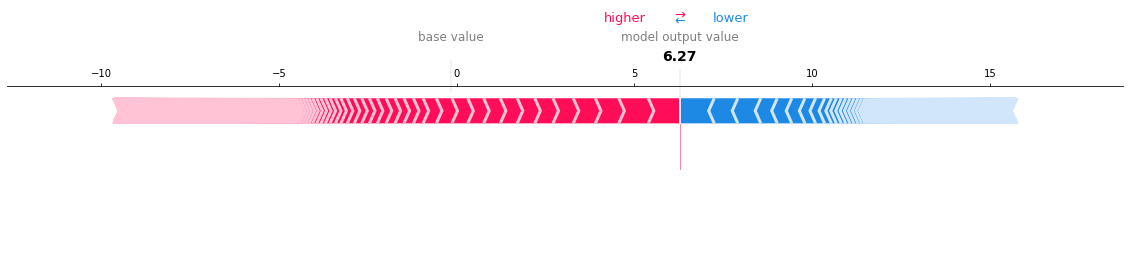

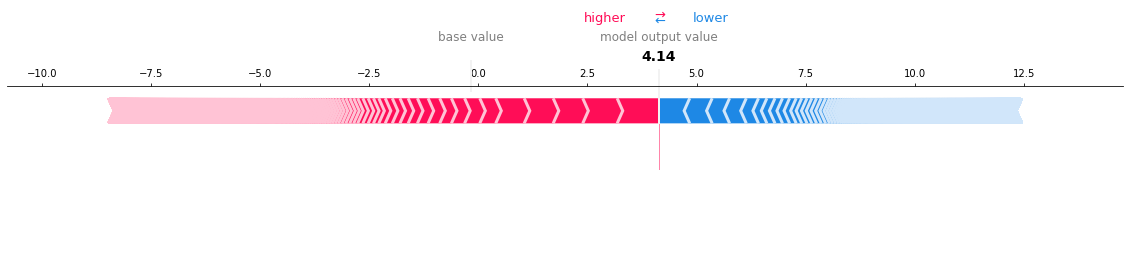

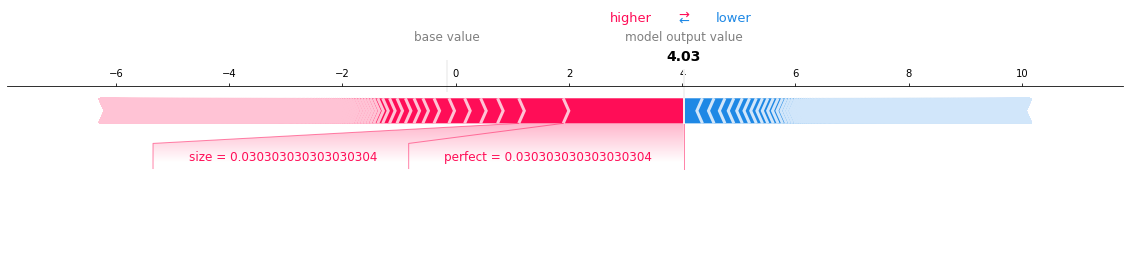

In [33]:
probs_low_to_high = np.argsort(y_prob[:, 1])
for i in range(10):
    shap.force_plot(
        shap_explainer.expected_value[1],
        shap_values[1][probs_low_to_high[-(i + 1)], :],
        training_data_transformed.iloc[probs_low_to_high[-(i + 1)], :],
        matplotlib=True,
    )